In [1]:
%run PyTorTractor.py

# Generating Wick Diagrams

In total there are 1 Correlator/s
 
****** Obtain Diagrams for Correlator 1 ******
We have following flavors ['u', 'd']
Obtain propagators for the u quarks...
Done.
Obtain propagators for the d quarks...
Done.
Multiply now the propagators with each others (redundant ones are not considered) and 
assign with each diagram the correct sign due to Grassmann-Algebra
Done.
Done.
In total, for this correlator there are 2 diagrams
 
**********************************************
 
 
********
3 combinations have been generated to do simplifications due to Collin's coefficients
Perform now the final simplification...

Diagram 1 has been added to diagram 0
 1 diagrams have been reduced
To visualize the diagrams use the attribute bulavision() 
Results saved successfully
numerical factor =  -2
Topology: 
[[[1, 0, 0], [0, 0, 1]], [[1, 0, 1], [0, 0, 0]], [[1, 0, 2], [0, 0, 2]]]


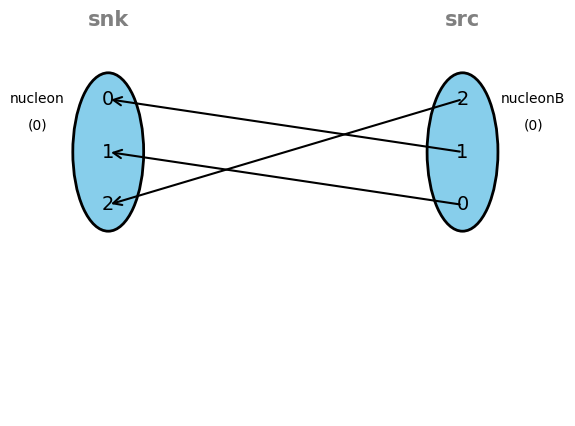

In [12]:
O1 = Nucleon(1/2)
O1_ontime = OpTimeSlice(1, O1)
O2 = bar(O1)
O2_ontime = OpTimeSlice(0, O2)
Correlator = O1_ontime * O2_ontime
Result = Correlator.Laudtracto()
writeresults(Result, O1_ontime, O2_ontime, path = 'PyTor_Test_1N.hdf5')
tcmpr = []
for res in Result:
    a = res.bulavision()
    tcmpr.append(np.array(a))

# Defining the participating Hadrons

In [2]:
Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'Hg_1', Displacement = 'SS_0')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'Hg_1', Displacement = 'SS_0')

Hadron3 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'A1um_1', Displacement = 'SS_0')
Hadron4 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'A1um_1', Displacement = 'SS_0')
Hadron5 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,2), Flavor = 'isovector_du',
          Momentum = 'mom_ray_000', LGIrrep = 'A1gm_1', Displacement = 'SS_0')
Hadron6 = Hadron(File_Info_Path = 'data/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,2), Flavor = 'isovector_du',
          Momentum = 'mom_ray_000', LGIrrep = 'A1gm_1', Displacement = 'SS_0')
hadrons = [Hadron3, Hadron4]

# Initializing the PyTorch tensors corresponding to Perambulators, ModeDoublets and/or Triplets

In [4]:
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = ['M_Tests/light_quark_perambulator_quda_5.hdf5'],#['data/p_snk0_src4.h5', 'data/p_src0_snk3_final.h5', 'data/snk4_src4.h5', 'data/p_snk1_src0.h5'], 
                                         Device = device, Double_Reading = True, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': None, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'M_Tests/mode_doublets_5.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'data/mode_triplets_1.hdf5', Device = device, cplx128 = complex128)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime4_snkTime0 has been constructed using infos about srcTime0_snkTime4!
Perambulator_Tensor has been successfully constructed
MD_Tensor has been successfully constructed
MT_Tensor has been successfully constructed


# Performing the tensor contractions

In [5]:
test0            = PyCorrTorch(SinkTime = 4, SourceTime = 0, 
                               Hadrons = hadrons, Path_Wicktract = 'PyTor_Test_1P.hdf5')
test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = None)
print(test0_contracted)
final_result = combine_all(test0_contracted)

Diagrams have been successfully clustered! There are 1 clusters
All combinations of hadron structures coefficients were generated
Insert now these combinations explicitly into the the clusters!
Each cluster is now splitted into many clusters with various explicit spin combinations
1 tensor contractions to be performed
One ModeDoublet/Triplet for all spin combination
0
([((((1, 0), (0, 0)), (0,)), tensor(-78.1372+5.0819e-16j, dtype=torch.complex128))], [np.int64(-1)])


In [6]:
final_result

(78.13719804676474-5.081876067246993e-16j)

# Performing the tensor contractions (Comparing) 1

In [7]:
Hadron1 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'A1um_1', Displacement = 'SS_0')
Hadron2 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'isovector_du',
          Momentum = (0,0,0), LGIrrep = 'A1um_1', Displacement = 'SS_0')
hadrons = [Hadron1, Hadron2]
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'data/perambs_ud_J.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': None, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'data/mode_triplets_1_Co.hdf5', Device = device, cplx128 = complex128)
res1 = []
res2 = []
for t in range(9):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'PyTor_Test_1P.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = None)
    res1.append(combine_all(test0_contracted))

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime10_snkTime0 has been constructed using infos about srcTime0_snkTime10!
 Perambulator for srcTime2_snkTime0 has been constructed using infos about srcTime0_snkTime2!
 Perambulator for srcTime7_snkTime0 has been constructed using infos about srcTime0_snkTime7!
 Perambulator for srcTime6_snkTime0 has been constructed using infos about srcTime0_snkTime6!
 Perambulator for srcTime4_snkTime0 has been constructed using infos about srcTime0_snkTime4!
 Perambulator for srcTime5_snkTime0 has been constructed using infos about srcTime0_snkTime5!
 Perambulator for srcTime8_snkTime0 has been constructed using infos about srcTime0_snkTime8!
 Perambulator for srcTime1_snkTime0 has been constructed using infos about srcTime0_snkTime1!
 Perambulator for srcTime15_snkTime0 has been constructed using infos about srcTime0_snkTime15!
 Perambulator for srcTime13_snkTime0 has been constructed using infos about

In [8]:
pion = [0 for i in range(9)]
pion[0] = (4.280143667070952-1.6350227456098284e-10j)
pion[1] = (0.19890361370339574+2.0411337069269912e-19j)
pion[2] = (0.018045616035938555-9.287810014024311e-21j)
pion[3] = (0.0018946498116805485-1.1890622859063506e-20j)
pion[4] = (0.00020157319714492162-1.1739847651772713e-24j)
pion[5] = (1.8042330243095597e-05-6.394253214143184e-23j)
pion[6] = (2.2887691463923263e-06-3.339507463452103e-24j)
pion[7] = (3.0520964074138293e-07-4.321697482287652e-24j)
pion[8] = (1.3201802790095467e-07-2.0338252452333878e-25j)

for i in range(len(res1)):
    print(f'pion({i}) = {res1[i]}')
    print(f'diff    = {res1[i]-pion[i]}')
    print('______')

pion(0) = (4.280143659103805-2.0335842623057437e-10j)
diff    = (-7.96714694217826e-09-3.9856151669591526e-11j)
______
pion(1) = (0.19890361519986793+1.7024899845669553e-18j)
diff    = (1.4964721961607808e-09+1.4983766138742562e-18j)
______
pion(2) = (0.018045615971228227+2.526732795131107e-19j)
diff    = (-6.47103273743177e-11+2.61961089527135e-19j)
______
pion(3) = (0.0018946497969563178+6.6782475867727744e-21j)
diff    = (-1.472423073224649e-11+1.856887044583628e-20j)
______
pion(4) = (0.0002015731975934616+5.266724565425566e-22j)
diff    = (4.4853996818833286e-13+5.278464413077339e-22j)
______
pion(5) = (1.804233037159407e-05+8.666091733261201e-23j)
diff    = (1.2849847257751477e-13+1.5060344947404386e-22j)
______
pion(6) = (2.2887691526249904e-06-6.725221259248334e-24j)
diff    = (6.232664090507958e-15-3.385713795796231e-24j)
______
pion(7) = (3.0520963776555407e-07-5.018259615168546e-24j)
diff    = (-2.9758288669413956e-15-6.965621328808937e-25j)
______
pion(8) = (1.3201802852099

# Performing the tensor contractions (Comparing) 2

In [9]:
Hadron1 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (0,0), Flavor = 'isovector_du',
          Momentum = (0,0,1), LGIrrep = 'A2m_1', Displacement = 'SS_1')
Hadron2 = Hadron(File_Info_Path = 'M_Tests/meson_operators.h5', Hadron_Type = 'meson_operators', Hadron_Position = (1,0), Flavor = 'isovector_du',
          Momentum = (0,0,1), LGIrrep = 'A2m_1', Displacement = 'SS_1')
hadrons = [Hadron1, Hadron2]
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'data/perambs_ud_J.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': None, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet         = PyTor_MTriplet(Path_ModeTriplet = 'data/mode_triplets_1_Co.hdf5', Device = device, cplx128 = complex128)
res1 = []
res2 = []
for t in range(9):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'PyTor_Test_1P.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = None)
    res1.append(combine_all(test0_contracted))

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime10_snkTime0 has been constructed using infos about srcTime0_snkTime10!
 Perambulator for srcTime2_snkTime0 has been constructed using infos about srcTime0_snkTime2!
 Perambulator for srcTime7_snkTime0 has been constructed using infos about srcTime0_snkTime7!
 Perambulator for srcTime6_snkTime0 has been constructed using infos about srcTime0_snkTime6!
 Perambulator for srcTime4_snkTime0 has been constructed using infos about srcTime0_snkTime4!
 Perambulator for srcTime5_snkTime0 has been constructed using infos about srcTime0_snkTime5!
 Perambulator for srcTime8_snkTime0 has been constructed using infos about srcTime0_snkTime8!
 Perambulator for srcTime1_snkTime0 has been constructed using infos about srcTime0_snkTime1!
 Perambulator for srcTime15_snkTime0 has been constructed using infos about srcTime0_snkTime15!
 Perambulator for srcTime13_snkTime0 has been constructed using infos about

In [10]:
pion = [0 for i in range(9)]
pion[0] = (0.39681125942845186-2.4863527388211196e-11j)
pion[1] = (0.006854588941944439+0.0018739050089830213j)
pion[2] = (0.00035147845393663704+7.051514602640161e-05j)
pion[3] = (4.853857783263503e-05+5.5342007300572974e-05j)
pion[4] = (3.512518353425199e-06+3.784624963843414e-06j)
pion[5] = (6.305396259865426e-07+1.6889171994483086e-07j)
pion[6] = (6.545752107319039e-09+4.143195530282928e-08j)
pion[7] = (6.449180817163239e-10+2.1060350468251335e-09j)
pion[8] = (1.2538175809018842e-09-1.1807728582266968e-10j)

for i in range(len(res1)):
    print(f'pion({i}) = {res1[i]}')
    print(f'diff    = {res1[i]-pion[i]}')
    print('______')

pion(0) = (0.39681125866098027-3.266084169271737e-11j)
diff    = (-7.674715862826531e-10-7.797314304506175e-12j)
______
pion(1) = (0.006854588966852253+0.0018739049724863146j)
diff    = (2.490781365882544e-11-3.649670669847449e-11j)
______
pion(2) = (0.0003514784430399821+7.05151494823478e-05j)
diff    = (-1.0896654943377132e-11+3.4559461954512816e-12j)
______
pion(3) = (4.853857787821044e-05+5.5342006735636164e-05j)
diff    = (4.5575414102383416e-14-5.649368098976579e-13j)
______
pion(4) = (3.512518453821349e-06+3.784624946833348e-06j)
diff    = (1.0039615004888368e-13-1.7010066095333445e-14j)
______
pion(5) = (6.305396287180966e-07+1.6889173237342674e-07j)
diff    = (2.731554094073912e-15+1.2428595882574183e-14j)
______
pion(6) = (6.545752003225727e-09+4.143195476854923e-08j)
diff    = (-1.0409331156490191e-16-5.34280047228949e-16j)
______
pion(7) = (6.449179896016224e-10+2.106035024559966e-09j)
diff    = (-9.211470149218777e-17-2.2265167608530643e-17j)
______
pion(8) = (1.2538176069

# Performing the tensor contractions (Comparing) 3

In [11]:
complex128          = True
device              = get_best_device(use_gpu = True, cplx128 = complex128)
perambulators_light = PyTor_Perambulator(Path_Perambulator = 'data/perambs_ud_J.hdf5', 
                                         Device = device, Double_Reading = False, cplx128 = complex128)
perambulator        = {'Light': perambulators_light, 'Strange': None, 'Charm': None}
modeDoublet         = PyTor_MDoublet(Path_ModeDoublet = 'data/mode_doublets_1.hdf5', Device = device, cplx128 = complex128)
modeTriplet_old         = PyTor_MTriplet(Path_ModeTriplet = 'data/mode_triplets_1_Co.hdf5', Device = device, cplx128 = complex128)
modeTriplet = {}
for i in range(9):
    new_name = 'px0_py0_pz0_ddir0_t'+str(i)
    modeTriplet[new_name] = modeTriplet_old[f'px0_py0_pz0_ddir0_dlen0_t{str(i)}']



Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_1', Displacement = 'SS_0')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_1', Displacement = 'SS_0')
hadrons = [Hadron1, Hadron2]
res1 = []
for t in range(9):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'PyTor_Test_1N.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res1.append(combine_all(test0_contracted))









Hadron1 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (1,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_2', Displacement = 'SS_0')
Hadron2 = Hadron(File_Info_Path = 'data/baryon_operators.h5', Hadron_Type = 'baryon_operators', Hadron_Position = (0,0), Flavor = 'nucleon_uud',
          Momentum = (0,0,0), LGIrrep = 'G1g_2', Displacement = 'SS_0')
hadrons = [Hadron1, Hadron2]
res2 = []
for t in range(9):
    test0 = PyCorrTorch(SinkTime = t, SourceTime = 0, Hadrons = hadrons, Path_Wicktract = 'PyTor_Test_1N.hdf5')
    test0_contracted = test0.TorchTractor(All_Perambulators = perambulator, ModeDoublets = modeDoublet, ModeTriplets = modeTriplet)
    res2.append(combine_all(test0_contracted))




final_res = []

if len(res1) != len(res2):
    raise TypeError('Error!')
else:
    for i in range(len(res1)):
        res_i = (res1[i] + res2[i]) / 2
        final_res.append(res_i)

Apple MPS backend detected, but CPU is in use (due to complex128 support).
 Perambulator for srcTime10_snkTime0 has been constructed using infos about srcTime0_snkTime10!
 Perambulator for srcTime2_snkTime0 has been constructed using infos about srcTime0_snkTime2!
 Perambulator for srcTime7_snkTime0 has been constructed using infos about srcTime0_snkTime7!
 Perambulator for srcTime6_snkTime0 has been constructed using infos about srcTime0_snkTime6!
 Perambulator for srcTime4_snkTime0 has been constructed using infos about srcTime0_snkTime4!
 Perambulator for srcTime5_snkTime0 has been constructed using infos about srcTime0_snkTime5!
 Perambulator for srcTime8_snkTime0 has been constructed using infos about srcTime0_snkTime8!
 Perambulator for srcTime1_snkTime0 has been constructed using infos about srcTime0_snkTime1!
 Perambulator for srcTime15_snkTime0 has been constructed using infos about srcTime0_snkTime15!
 Perambulator for srcTime13_snkTime0 has been constructed using infos about

In [12]:
nucleon = [0 for i in range(9)]
for t in range(9):
    P = perambulators_light[f'srcTime0_snkTime{t}']
    Bso = modeTriplet['px0_py0_pz0_ddir0_t0']
    Bsi = modeTriplet[f'px0_py0_pz0_ddir0_t{t}']
    CN1 = torch.einsum('klm,KLM,kK,lL,mM->', Bsi, Bso.conj(),P[0,0],P[0,0], P[1,1]) - torch.einsum('klm,KLM,kK,lL,mM->', Bsi, Bso.conj(),P[0,0],P[0,1], P[1,0])
    CN2 = torch.einsum('klm,KLM,kK,lL,mM->', Bsi, Bso.conj(),P[1,1],P[0,0], P[1,1]) - torch.einsum('klm,KLM,kK,lL,mM->', Bsi, Bso.conj(),P[1,1],P[0,1], P[1,0])
    to_add = 3 * (CN1.item()+CN2.item())/2
    nucleon[t] = to_add

In [14]:
for i in range(len(final_res)):
    print(f'nucleon({i}) = {final_res[i].real }')
    print(f'diff    = {final_res[i].real-nucleon[i].real}')
    print('______')

nucleon(0) = 0.0003009130457605867
diff    = 5.421010862427522e-20
______
nucleon(1) = 4.25767564317817e-06
diff    = -8.470329472543003e-22
______
nucleon(2) = 1.42218697646888e-07
diff    = 0.0
______
nucleon(3) = 2.588422730305057e-09
diff    = -4.1359030627651384e-25
______
nucleon(4) = 4.3053433632724e-11
diff    = 0.0
______
nucleon(5) = 1.618683374616788e-12
diff    = 2.0194839173657902e-28
______
nucleon(6) = -1.743260918658528e-14
diff    = 3.1554436208840472e-30
______
nucleon(7) = -1.117968776196914e-15
diff    = 0.0
______
nucleon(8) = 2.1203942426327784e-17
diff    = 3.0814879110195774e-33
______
